# Statistics Journey Part 3 - Measures of Dispersion 

Exercise 1:
Use data on White House staff salaries for 2010 (‘White_house.csv’).
- Summarize the distribution of salaries using appropriate measures of dispersion. Which
groups of workers (based on a position) exhibit the greatest variation in salaries?
- Calculate the mean, median and mode of the salaries. What can you say about the shape
of the distribution of the salaries? Verify your answer and calculate relevant measures
of shape.
- Check your data for the presence of outliers using the three rules we covered during the
class.

In [1]:
import pandas as pd 
import numpy as np 
import random 
import math

/var/folders/1m/mckmrfpx3yn1g1wj1m8cxm000000gn/T/ipykernel_97506/3595694020.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
wh = pd.read_csv("/Users/konradwronski/Desktop/Projects/Grind/DataScienceJungle/EDA/White_house.csv")
wh.head(10)

,Employee Name,Employee Status,Salary,Pay Basis,Position Title
Abrams,Adam W.,Employee,66300.0,Per Annum,WESTERN REGIONAL COMMUNICATIONS DIRECTOR
Adams,Ian H.,Employee,45000.0,Per Annum,EXECUTIVE ASSISTANT TO THE DIRECTOR OF SCHEDUL...
Agnew,David P.,Employee,93840.0,Per Annum,DEPUTY DIRECTOR OF INTERGOVERNMENTAL AFFAIRS
Albino,James,Employee,91800.0,Per Annum,SENIOR PROGRAM MANAGER
Aldy,Joseph E.,Employee,130500.0,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT FOR ENERGY ...
Alley,Hilary J.,Employee,42000.0,Per Annum,STAFF ASSISTANT
Amorsingh,Lucius L.,Employee,56092.0,Per Annum,SPECIAL ASSISTANT
Anderson,Amanda D.,Employee,60000.0,Per Annum,SPECIAL ASSISTANT TO THE CHIEF OF STAFF
Anderson,Charles D.,Employee,51000.0,Per Annum,POLICY ASSISTANT
Andrias,Kate E.,Employee,130500.0,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIA...


In [4]:
wh["Position Title"].value_counts()

Position Title
STAFF ASSISTANT                                                                                      24
RECORDS MANAGEMENT ANALYST                                                                           15
ANALYST                                                                                              11
SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIATE COUNSEL TO THE PRESIDENT                            10
SPECIAL ASSISTANT TO THE PRESIDENT FOR LEGISLATIVE AFFAIRS                                           10
                                                                                                     ..
DIRECTOR OF SPECIALITY MEDIA                                                                          1
DEPUTY ASSOCIATE COUNSEL FOR PRESIDENTIAL PERSONNEL                                                   1
DEPUTY ASSOCIATE DIRECTOR OF CORRESPONDENCE FOR THE FIRST LADY                                        1
SENIOR ADVISOR AND ASSISTANT TO THE PRESIDENT FOR

Dispersion of salaries

In [5]:
ran = max(wh["Salary"]) - min(wh["Salary"])
maximum = max(wh["Salary"])
minimum = min(wh["Salary"])
var = np.var(wh["Salary"])
sd = np.std(wh["Salary"])

ran, maximum, minimum, var, sd

(179700.0, 179700.0, 0.0, 1727543457.8992198, 41563.72767088173)

Mean, median and mode of the salaries. What can you say about the shape
of the distribution of the salaries? Verify your answer and calculate relevant measures
of shape.

In [7]:
from scipy import stats
mu = np.mean(wh["Salary"])
me = np.median(wh["Salary"])
mo = stats.mode(wh["Salary"])[0]

mu, me, mo

(82302.30329670329, 66300.0, 42000.0)

Mode < Median < Mean - Thus, distribution is left skewed. 

![Screenshot 2025-03-05 at 00.29.50.png](<attachment:Screenshot 2025-03-05 at 00.29.50.png>)
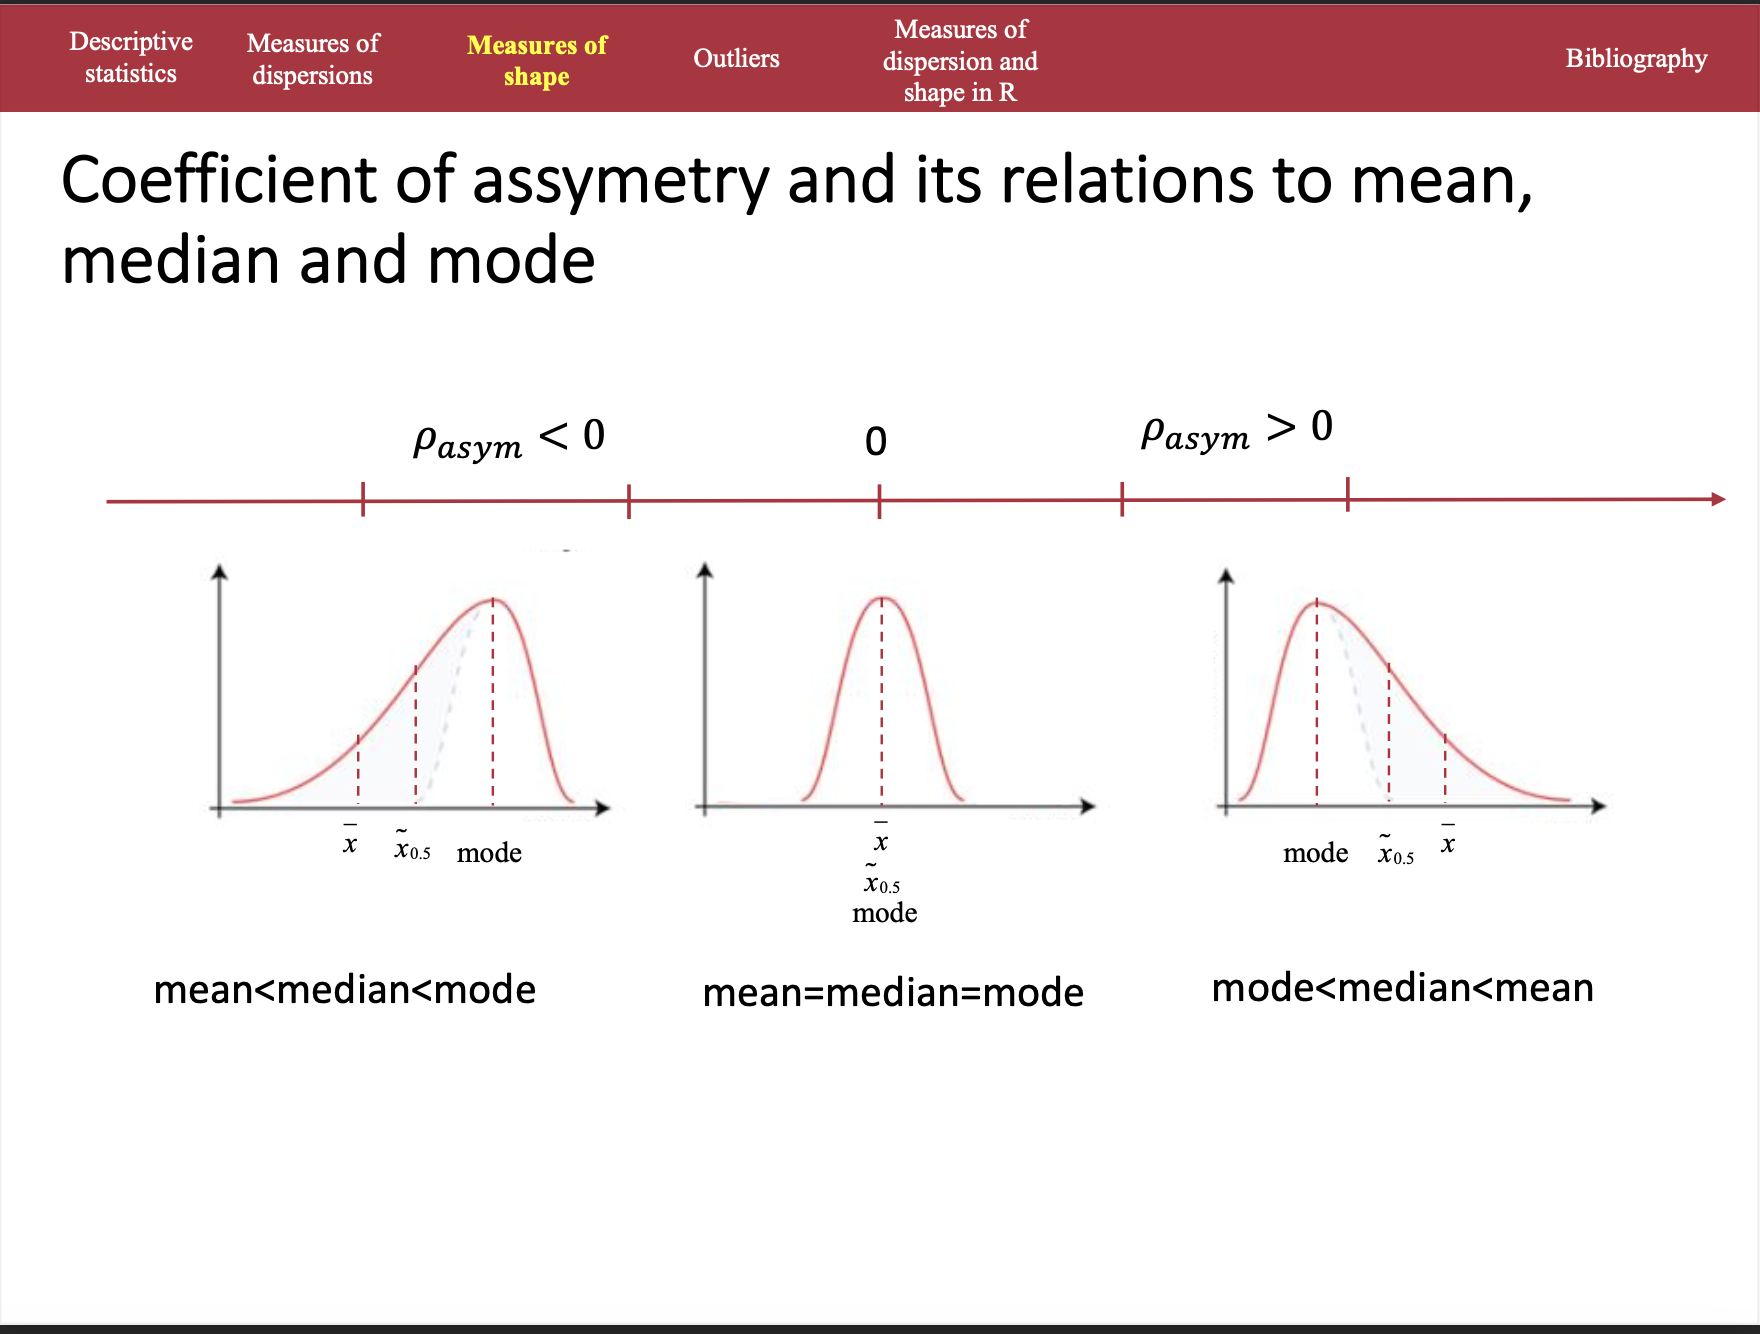

Exercise 2 

Use data on fruit consumption per person by country for the years 1961-2013
(‘Fruit_consumption.csv).
 - Identify countries that exhibit the maximum and minimum fruit consumption in 2013.
 - For each country calculate variance and standard deviation of fruit consumption.
 - What can you say about the distribution of fruit consumption in the United States?

In [11]:
fruit = pd.read_csv("/Users/konradwronski/Desktop/Projects/Grind/DataScienceJungle/EDA/Fruit_consumption.csv", sep=",", on_bad_lines="skip")
fruit.head(5)

,Entity,Code,Year,Consumption
0,Afghanistan,AFG,1961,41.13
1,Afghanistan,AFG,1962,38.00
2,Afghanistan,AFG,1963,38.25
3,Afghanistan,AFG,1964,47.92
4,Afghanistan,AFG,1965,48.69


In [17]:
max_fruit = max(fruit["Consumption"])
min_fruit = min(fruit["Consumption"])


min_country = fruit.loc[fruit['Consumption'] == min_fruit, ["Consumption" , "Entity"]]
max_country = fruit.loc[fruit['Consumption'] == max_fruit, ['Entity']] 
min_country

,Consumption,Entity
2411,0.0,Djibouti
2412,0.0,Djibouti
2413,0.0,Djibouti
2414,0.0,Djibouti
2415,0.0,Djibouti


Variance for each country

In [18]:
fruit[["Entity", "Consumption"]].groupby(["Entity"]).describe()

Consumption                                                      \
                   count       mean        std    min    25%    50%      75%   
Entity                                                                         
Afghanistan         53.0  33.367547  10.017429  18.56  25.90  30.21   39.070   
Africa              53.0  54.774528   5.882993  45.32  50.47  53.45   58.770   
Albania             53.0  60.082830  33.351167  19.58  40.32  44.62   70.530   
Algeria             53.0  47.637547  20.488195  27.49  35.89  39.56   46.910   
Americas            53.0  98.448491   9.190835  77.31  93.83  99.75  105.370   
...                  ...        ...        ...    ...    ...    ...      ...   
World               53.0  53.011509  11.333202  37.75  44.15  49.55   60.490   
Yemen               53.0  32.668302  10.280243  16.18  24.12  31.94   38.280   
Yugoslav SFR        31.0  58.307097   7.341692  38.32  53.42  58.19   62.845   
Zambia              53.0  11.376604   0.911588   9.51  10.70  11.40   12.100   
Zimbabwe            53.0  12.703585   1.643298   9.86  11.85  12.22   13.550   

                      
                 max  
Entity                
Afghanistan    55.94  
Africa         66.80  
Albania       142.00  
Algeria       114.19  
Americas      113.66  
...              ...  
World          77.87  
Yemen          58.95  
Yugoslav SFR   73.96  
Zambia         13.13  
Zimbabwe       17.90  

[213 rows x 8 columns]